# **PROGRAMMING II: COMPANIES IN VIZCAYA (SPAIN)**

### **Performed by:**  


#### ***Ruth Merchán Soledispa***  
  
  

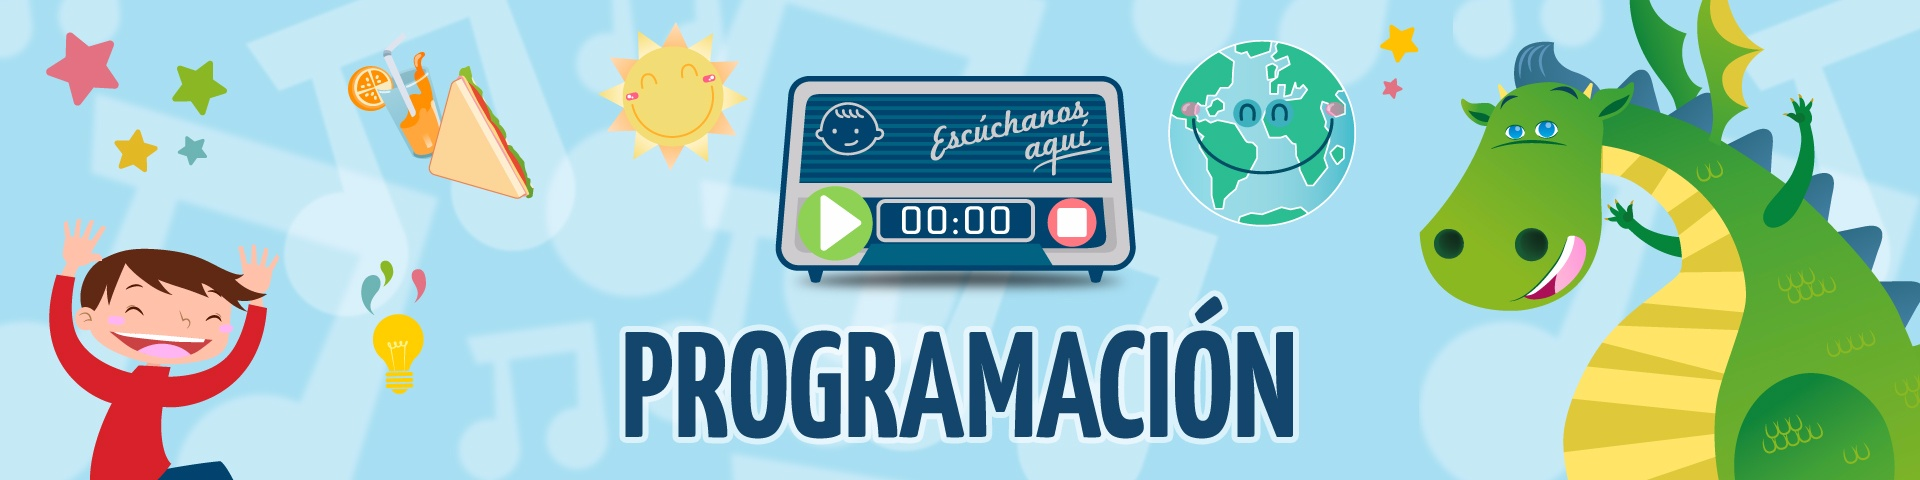

In [338]:
from IPython.display import Image
Image(filename='programacion.jpg')

## **1) WEB SCRAPING: INFOCIF COMPANIES IN VIZCAYA**

In [2]:
#First I import all the libraries that I will use during the whole work... then I will import more...

import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import matplotlib
import os
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#Web scraping...I create several lists to store the information

rank=[]
name=[]
sales17=[]
sales16=[]
sales=[]
resultado17=[]
EBITDA17=[]
employee_number=[]
town=[]
sector=[]
sect=[]
urls=[]
pagina=1
for i in range (1,22):
    page=requests.get("http://www.infocif.es/ranking/ventas-empresas/vizcaya?pagina="+str(pagina))
    soup=BeautifulSoup(page.content, "html.parser")
    balance=soup.find(id="tablaranking")
    pagina=pagina+1
    
#getting the names of the companies
    empresas=balance.find_all(class_="prnone valignmiddle")
    companies=[c.get_text() for c in empresas]
    for i in companies:
        name.append(i[2:-1])
        
#getting the url of each company
    web=soup.find_all(class_="fs11 valignmiddle")
    for link in web[0::3]:
        urls.append(link.get("href").strip())

#obtaining the sales of the year 2017
    sales_17=balance.find_all(class_="text-right fs11 fwb valignmiddle")
    sales_17=[s17.get_text() for s17 in sales_17]
    for i in sales_17:
        sales17.append(i.strip())
        
#getting the location and sector
    pl=balance.find_all(class_="fs11 valignmiddle")
    pl=[pl.get_text() for pl in pl]
    for i in pl:
        sect.append(i.strip().split("\n\t\r"))
        
#obtaining 2016 sales, 2017 result, EBITDA and no. of employees, ranking
    sales_16=balance.find_all(class_="text-right fs11 valignmiddle")
    sales_16=[s16.get_text() for s16 in sales_16]
    for i in sales_16:
        sales.append(i.strip().split(" \n\t"))

#sector
for i in sect[1::3]:
    sector.extend(i)
#location
for i in sect[2::3]:
    town.extend(i)
#ranking
for i in sales[0::5]:
    rank.append(i[0][35::1].strip("()").split("(")[-1])
#sales 2016
for i in sales[1::5]:
    sales16.extend(i)
#result 2017
for i in sales[2::5]:
    resultado17.extend(i)
#EBITDA
for i in sales[3::5]:
    EBITDA17.extend(i) 
#number of employees
for i in sales[4::5]:
    employee_number.extend(i)

## **2) STORAGE OF EXTRACTED INFORMATION IN A CSV FILE**

In [ ]:
#As it doesn't allow me to pass the data to csv because of the unicode, I do the following and in the next step I convert it to an array...
lista=[name,rank,sales17,sales16,resultado17,EBITDA17,employee_number,sector,town,urls]
nueva_lista=[]
for i in lista:
    nueva_lista.append([x.encode('UTF8') for x in i])

#I store my information in a file permanently and for this we transfer it to a csv file
vizcaya = open('vizcaya.csv', 'wb')
mywriter = csv.writer(vizcaya)

#I create the labels from the information I have extracted...
etiquetas=[("Empresa","Ranking","Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados","Sector","Localidad (Provincia)","Pagina Web")]
mywriter.writerows(etiquetas)

#We create an array and then transpose it to make it easier to write to csv...
data=np.array(nueva_lista)
mywriter.writerows(data.T)

#I make sure to close the file so that no data is lost.
vizcaya.close()

## **3) WE OPEN OUR DATA IN A DATAFRAME**

In [7]:
vizcaya = pd.read_csv("vizcaya.csv",  sep=',')
vizcaya.head(4)

,Empresa,Ranking,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados,Sector,Localidad (Provincia),Pagina Web
0,IBERDROLA CLIENTES SA,15.0,7.564.431.000,7.438.203.000,424.119.000,575.519.000,503,Utilities / Servicios de utilidad pública,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/iberdrola-...
1,IBERDROLA GENERACION ESPAÑA SA,17.0,6.755.841.000,6.711.572.000,446.345.000,418.549.000,258,Utilities / Servicios de utilidad pública,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/iberdrola-...
2,PETROLEOS DEL NORTE SA,21.0,5.446.768.000,4.619.628.000,178.224.000,255.933.000,1.035,Petróleo y gas,muskiz(VIZCAYA),http://www.infocif.es/ficha-empresa/petroleos-...
3,BANCO BILBAO VIZCAYA ARGENTARIA SA,25.0,5.019.000.000,6.376.000.000,2.083.000.000,2.256.000.000,-,Intermediarios financieros,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/banco-bilb...


In [8]:
print vizcaya.info()

#As the data are at the moment, we cannot make any calculations or graphical representations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
Empresa                  1044 non-null object
Ranking                  1044 non-null float64
Ventas 2017              1044 non-null object
Ventas 2016              1044 non-null object
Resultado 2017           1044 non-null object
EBITDA 2017              1044 non-null object
Empleados                1044 non-null object
Sector                   1044 non-null object
Localidad (Provincia)    1044 non-null object
Pagina Web               1044 non-null object
dtypes: float64(1), object(9)
memory usage: 81.6+ KB
None


### ***3.1. Data cleaning and preparation***

In [9]:
#As it is not possible for me to work with the data as it is we make the following changes:

#we move our original ranking list resulting from web scraping from unicode format to normal
new_rank=[]
new_rank.extend([x.encode('UTF8') for x in rank])
    
#Since we have not obtained the raking column with the desired format, we take the original list when we extracted the data from the web page and replace the ranking column with a column with the same data but obtained through this list. 
# the web page and replace the ranking column by a column with the same data but obtained from this list
vizcaya["Ranking"]=new_rank

#We eliminate the dots and use a lambda function for this purpose
vizcaya[["Ranking","Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados"]] = vizcaya[["Ranking","Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados"]].applymap(lambda x: str(x.replace(".", "")))

#We replace the undetected null values "-" by NaN
vizcaya.replace("-", np.nan, inplace=True)

#We replace these NaN by zeros to convert certain columns to integer type
vizcaya1 = vizcaya.replace(np.nan, 0)

#We convert these columns into numerical columns for further handling
vizcaya1[["Ranking","Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados"]] = vizcaya1[["Ranking","Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados"]].apply(pd.to_numeric)

In [10]:
#We print the DataFrame information to see if the changes have taken effect
print vizcaya1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
Empresa                  1044 non-null object
Ranking                  1044 non-null int64
Ventas 2017              1044 non-null int64
Ventas 2016              1044 non-null int64
Resultado 2017           1044 non-null int64
EBITDA 2017              1044 non-null int64
Empleados                1044 non-null int64
Sector                   1044 non-null object
Localidad (Provincia)    1044 non-null object
Pagina Web               1044 non-null object
dtypes: int64(6), object(4)
memory usage: 81.6+ KB
None


In [11]:
#We print part of the dataframe to see if the changes have taken effect
vizcaya1.head()

#We now have our data cleaned and almost ready to be studied

,Empresa,Ranking,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados,Sector,Localidad (Provincia),Pagina Web
0,IBERDROLA CLIENTES SA,15,7564431000,7438203000,424119000,575519000,503,Utilities / Servicios de utilidad pública,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/iberdrola-...
1,IBERDROLA GENERACION ESPAÑA SA,17,6755841000,6711572000,446345000,418549000,258,Utilities / Servicios de utilidad pública,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/iberdrola-...
2,PETROLEOS DEL NORTE SA,21,5446768000,4619628000,178224000,255933000,1035,Petróleo y gas,muskiz(VIZCAYA),http://www.infocif.es/ficha-empresa/petroleos-...
3,BANCO BILBAO VIZCAYA ARGENTARIA SA,25,5019000000,6376000000,2083000000,2256000000,0,Intermediarios financieros,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/banco-bilb...
4,ALVEAN SUGAR SL,38,3831215000,4343363000,2667000,12845000,3,Productos alimenticios,BILBAO(VIZCAYA),http://www.infocif.es/ficha-empresa/alvean-sug...


In [12]:
#We have our DataFrame almost ready, but as we can see the column "Locality (Province)" is very messed up.
#Therefore, another change that we must make is the names of localities, since there are many localities repeated in 
# and capital letters or localities written in half, which complicates our analysis when grouping, e.g.

#We put all this column in lowercase:
vizcaya1["Localidad (Provincia)"] = map(str.lower, vizcaya1["Localidad (Provincia)"])

#MWe will see how many unique values there are to know what changes we need to continue to make.
print len(vizcaya1["Localidad (Provincia)"].unique())
print vizcaya1["Localidad (Provincia)"].unique()

123
['bilbao(vizcaya)' 'muskiz(vizcaya)' 'elorrio(vizcaya)'
 'galdakao(vizcaya)' 'basuri(vizcaya)' 'zamudio(vizcaya)'
 'basauri(vizcaya)' 'amorebieta(vizcaya)' '5(vizcaya)' 'getxo(vizcaya)'
 'zierbena(vizcaya)' 'derio(vizcaya)' 'abadiano(vizcaya)'
 'abadi\xc3\x91o(vizcaya)' 'erandio(vizcaya)' 'ermua(vizcaya)'
 'trapagaran(vizcaya)' 'bedia(vizcaya)' 'benifayo(vizcaya)'
 'loiu(vizcaya)' 'berango(vizcaya)' 'leioa(vizcaya)' 'sestao(vizcaya)'
 'orozko(vizcaya)' 'iurreta(vizcaya)' 'me\xc3\x91aka(vizcaya)'
 'bermeo(vizcaya)' 'etxebarria(vizcaya)' 'trapaga(vizcaya)'
 'valle de trapag(vizcaya)' 'igorre(vizcaya)' 'barakaldo(vizcaya)'
 'amorebieta-etxa(vizcaya)' 'mungia(vizcaya)' 'arrankudiaga(vizcaya)'
 'galdakano(vizcaya)' 'munguia(vizcaya)' 'berriz(vizcaya)'
 'arriandi s/n(vizcaya)' 'atxondo(vizcaya)' 'abanto y cierva(vizcaya)'
 'bolbao(vizcaya)' 'baracaldo(vizcaya)' 'urduliz(vizcaya)'
 'lezama(vizcaya)' 'galakao(vizcaya)' 'santurce(vizcaya)'
 'larrabetzu(vizcaya)' 'abanto(vizcaya)' 'zaldibar(

In [13]:
#After taking a look at the unique values and seeing in Google all the localities of Vizcaya, we realize that we need to make some changes.
#there are some changes to be made, so we replace some names that are half or incorrectly spelled.
#We are lucky that the list is small and that there are only a little more than 1000 companies located in a little more than 100 localities, 
#but with the search for information on the internet, this is what I have been able to do.

vizcaya1["Localidad (Provincia)"].replace(['basuri(vizcaya)'], 'basauri(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['valle de trápag(vizcaya)','valle de trapag(vizcaya)','trapaga(vizcaya)','valle de tra(vizcaya)'], 'trapagaran(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['5(vizcaya)','valencia(vizcaya)','zorroza(vizcaya)','bilbo(vizcaya)','bibao(vizcaya)','bailbao(vizcaya)','bolbao(vizcaya)','bizkaia(vizcaya)'], 'bilbao(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['amorebieta-etxa(vizcaya)','amorebieta etxa(vizcaya)','amorebieta-e(vizcaya)','amorebieta-echa(vizcaya)','zornotza(vizcaya)'], 'amorebieta(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['munguia(vizcaya)'], 'mungia(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['galdakano(vizcaya)','galakao(vizcaya)','galdacano(vizcaya)','usansolo(vizcaya)'], 'galdakao(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['baracaldo(vizcaya)'], 'barakaldo(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['arriandi s/n(vizcaya)'], 'iurreta(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['gallarta(vizcaya)','abanto y cierva(vizcaya)','abanto(vizcaya)','abanto y cer(vizcaya)','abanto-zierbena(vizcaya)'], 'abanto y ciervana(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['santurce(vizcaya)','santurtzi(vizcaya)'], 'santurtzi(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['leoia(vizcaya)','lejona(vizcaya)'], 'leioa(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['sondica(vizcaya)'], 'sondika(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['izurza(vizcaya)'], 'izurtza(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['erando-asua(vizcaya)','asua-erancio(vizcaya)','erandio-goikoa(vizcaya)','asua-erandio(vizcaya)','asua(vizcaya)','erando(vizcaya)'], 'erandio(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['sopela(vizcaya)'], 'sopelana(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['markina(vizcaya)','markina-xemein(vizcaya)'], 'markina xemein(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['lemona(vizcaya)'], 'lemoa(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['guecho(vizcaya)','las arenas-getx(vizcaya)','algorta(vizcaya)'], 'getxo(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['igorra(vizcaya)'], 'igorre(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['orozco(vizcaya)','bengoetxea(vizcaya)'], 'orozko(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['gernila-lumo(vizcaya)'], 'gernika(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['ugao miravalles(vizcaya)'], 'ugao-miraballes(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['sodupe-gÜeÑes(vizcaya)','zaramillo-gueñe(vizcaya)'], 'guenes(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['abadiÑo(vizcaya)','abadiano(vizcaya)'], 'abadino(vizcaya)', inplace=True)
vizcaya1["Localidad (Provincia)"].replace(['zaldiba(vizcaya)'], 'zaldibar(vizcaya)', inplace=True)


In [14]:
#We do the same for the "Sector" column, so that we have managed to group the companies in 12 sectors

vizcaya1["Sector"].replace(['Productos químicos y plásticos','Productos electrónicos / eléctricos','Metales no ferrosos / minerales','Acero','Equipamiento industrial en metal','Equipos industriales','Industria maderera','Industria naval','Automotor'], 'Industria', inplace=True)
vizcaya1["Sector"].replace(['Transporte aéreo','Transporte marítimo','Transporte terrestre'], 'Transporte', inplace=True)
vizcaya1["Sector"].replace(['Intermediarios financieros','Seguro'], 'Servicios Financieros', inplace=True)
vizcaya1["Sector"].replace(['Aeroespacial y defensa','Gobierno / Estado'], 'Administracion Publica y Defensa', inplace=True)
vizcaya1["Sector"].replace(['Construcción y Desarrollo','Inmobiliarias y similares'], 'Construccion', inplace=True)
vizcaya1["Sector"].replace(['Productos cosméticos / Cuidado Personal','Productos fármacos / Medicamentos','Muebles para el hogar / Equipar','Ropa / textiles','Productos alimenticios','Minoristas de alimentos / medicamentos','Alojamiento y casinos','Servicio de comida','Bebidas y Tabaco','Minoristas (excepto alimentos y medicamentos)'], 'Comercio y Hosteleria', inplace=True)
vizcaya1["Sector"].replace(['Radio y Televisión','Telecomunicaciones','Publicación'], 'Informacion y Comunicaciones', inplace=True)
vizcaya1["Sector"].replace(['Petróleo y gas','Utilities / Servicios de utilidad pública'], 'Energia electrica y Petroleo', inplace=True)
vizcaya1["Sector"].replace(['Productos / actividades de ocio / Películas','Equipos y servicios comerciales','Servicios & Equipos Ecológicos','Consultoría empresarial y otros'], 'Actividades profesionales, cientificas y tecnicas', inplace=True)
vizcaya1["Sector"].replace(['Otros / varios'], 'Otros Servicios', inplace=True)
vizcaya1["Sector"].replace(['Cuidado de la salud'], 'Actividades sanitarias y Servicios sociales', inplace=True)

In [15]:
#We reprint the length of unique values contained in the columns and observe that they have been substantially reduced...
# Moreover, we can also observe that these columns are more uniform...

print len(vizcaya1["Localidad (Provincia)"].unique())
print len(vizcaya1["Sector"].unique())
vizcaya1.head()


#Now we have our DataFrame ready for analysis.

68
12


,Empresa,Ranking,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados,Sector,Localidad (Provincia),Pagina Web
0,IBERDROLA CLIENTES SA,15,7564431000,7438203000,424119000,575519000,503,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...
1,IBERDROLA GENERACION ESPAÑA SA,17,6755841000,6711572000,446345000,418549000,258,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...
2,PETROLEOS DEL NORTE SA,21,5446768000,4619628000,178224000,255933000,1035,Energia electrica y Petroleo,muskiz(vizcaya),http://www.infocif.es/ficha-empresa/petroleos-...
3,BANCO BILBAO VIZCAYA ARGENTARIA SA,25,5019000000,6376000000,2083000000,2256000000,0,Servicios Financieros,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/banco-bilb...
4,ALVEAN SUGAR SL,38,3831215000,4343363000,2667000,12845000,3,Comercio y Hosteleria,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/alvean-sug...


In [16]:
#But first, we pass our dataframe to an excel for security...
#we use this code as a consequence of this error: 'ascii' codec can't decode byte 0xc3 in position 32: ordinal not in range(128)

writer = pd.ExcelWriter('vizcaya_excel.xlsx', engine='openpyxl')
vizcaya1.to_excel(writer)
writer.save()

### ***3.2 Data Analysis and Representation***

In [17]:
#A preliminary analysis would be to obtain the descriptive statistics of our data of interest.

vizcaya1[["Ventas 2017","Ventas 2016","Resultado 2017","EBITDA 2017","Empleados"]].describe()

#We see that in Vizcaya the average sale for the year 2017 is almost 68 million, which would not be very representative since.
#that there is a company that obtained a maximum of approximately 7565 billion euros. A similar situation can be 
#observe for the year 2016 and for the other variables of the year 2017. In the result and EBITDA we see that there are even values. 
#negative (losses) and as for the employees the average differs a lot from the maximum, since there is a company where 
#work almost 29 thousand people.


,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados
count,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1044.000000
mean,6.758776e+07,7.268022e+07,6.952052e+06,1.013700e+07,137.841954
std,4.352019e+08,4.471429e+08,1.079224e+08,1.235157e+08,935.309950
min,0.000000e+00,0.000000e+00,-1.343435e+09,-1.169782e+09,0.000000
25%,5.879794e+06,6.574320e+06,0.000000e+00,6.494925e+04,9.000000
50%,1.012432e+07,1.155313e+07,2.240165e+05,5.686800e+05,32.000000
75%,2.226999e+07,2.642575e+07,9.990305e+05,1.881310e+06,86.000000
max,7.564431e+09,7.438203e+09,2.083000e+09,2.256000e+09,28466.000000


In [18]:
#Descriptive statistics of Biscay companies in terms of their average EBITDA and average sales in 2017 grouped by sector.

vizcaya1.groupby(["Sector"])['Ventas 2017','EBITDA 2017'].mean()

#we see losses in the construction sector. 

,Ventas 2017,EBITDA 2017
Sector,,
"Actividades profesionales, cientificas y tecnicas",2.918229e+07,5.101515e+06
Actividades sanitarias y Servicios sociales,1.115865e+07,1.227453e+06
Administracion Publica y Defensa,1.070514e+08,1.470934e+07
Agricultura,3.215571e+07,6.714723e+06
Comercio y Hosteleria,6.908712e+07,2.901209e+06
Construccion,2.074059e+07,-5.130593e+06
Energia electrica y Petroleo,7.250456e+08,1.305792e+08
Industria,2.917233e+07,2.667271e+06
Informacion y Comunicaciones,3.404321e+07,7.192408e+06


#### ***GRAFICA 1: REPRESENTACION DEL NUMERO DE EMPRESAS EN VIZCAYA POR SECTORES***

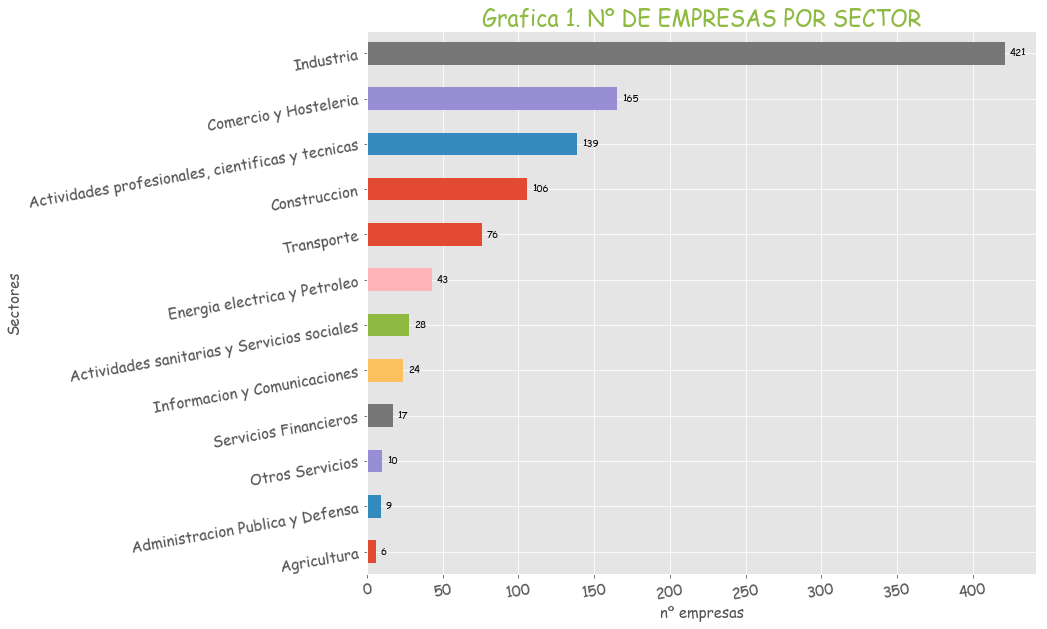

In [573]:
#We represent the number of companies by sector.


matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

company_sector=vizcaya1['Sector'].value_counts()
ten_common_1=company_sector[:12].sort_values().plot(kind='barh', fontsize=13, figsize=(12, 10))

ten_common_1.set_title(u"Grafica 1. Nº DE EMPRESAS POR SECTOR", loc='center', fontname='Comic Sans MS', fontsize=22, color='C5')
ten_common_1.set_xlabel(u'nº empresas', fontsize=15, fontname='Comic Sans MS')
ten_common_1.set_ylabel('Sectores', fontsize=15, fontname='Comic Sans MS')
plt.xticks(rotation=10, fontsize=15);
plt.yticks(rotation=10, fontsize=15);

for tick in ten_common_1.get_yticklabels():
    tick.set_fontname("Comic Sans MS")
    
    
rects = ten_common_1.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig(os.path.join('grafica_1.png'), dpi=900, format='png', bbox_inches='tight')

#We can observe that most of the companies in Vizcaya are located in the industrial sector. The industrial sector is 
#the sector with the greatest weight by far with more than 400 companies in Vizcaya. 

#### ***GRAPH 2: REPRESENTATION OF THE PERCENTAGE OF COMPANIES IN VIZCAYA BY SECTOR***

In [294]:
#Now by percentage
empresas_sector=vizcaya1['Sector'].value_counts()
total_empresas=vizcaya1["Empresa"].count()
porcentaje_sector=empresas_sector/total_empresas*100

lista_vacia=[]
for i in porcentaje_sector:
    lista_vacia.append(round(i,2))

sectores=empresas_sector.reset_index()
sectores=sectores["index"]
porcentaje_sectores=pd.DataFrame({"sectores":sectores,"Porcentajes":lista_vacia})

porcentaje_sectores=porcentaje_sectores.set_index("sectores")
porcentaje_sectores

,Porcentajes
sectores,
Industria,40.33
Comercio y Hosteleria,15.80
"Actividades profesionales, cientificas y tecnicas",13.31
Construccion,10.15
Transporte,7.28
Energia electrica y Petroleo,4.12
Actividades sanitarias y Servicios sociales,2.68
Informacion y Comunicaciones,2.30
Servicios Financieros,1.63


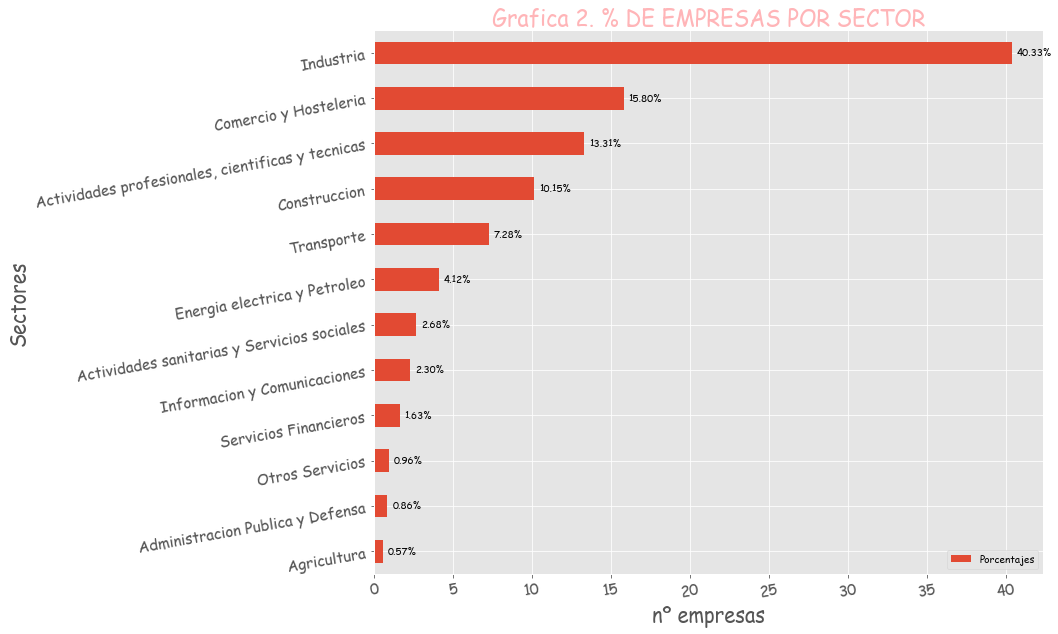

In [574]:
porcentaje_sectores1=porcentaje_sectores.plot(kind='barh', fontsize=13, figsize=(12, 10))

porcentaje_sectores1.set_title(u"Grafica 2. % DE EMPRESAS POR SECTOR", loc='center', fontname='Comic Sans MS', fontsize=22, color='C6')
porcentaje_sectores1.set_xlabel(u'nº empresas', fontsize=20, fontname='Comic Sans MS')
porcentaje_sectores1.set_ylabel('Sectores', fontsize=20, fontname='Comic Sans MS')
plt.xticks(rotation=10, fontsize=15);
plt.yticks(rotation=10, fontsize=15);

for tick in porcentaje_sectores1.get_yticklabels():
    tick.set_fontname("Comic Sans MS")
    
    
rects = porcentaje_sectores1.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}%".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
porcentaje_sectores1.invert_yaxis()

plt.savefig(os.path.join('grafica_2.png'), dpi=900, format='png', bbox_inches='tight')

#### ***GRAPH 3: REPRESENTATION OF THE PERCENTAGE OF COMPANIES IN VIZCAYA BY SECTOR (DONUT)***

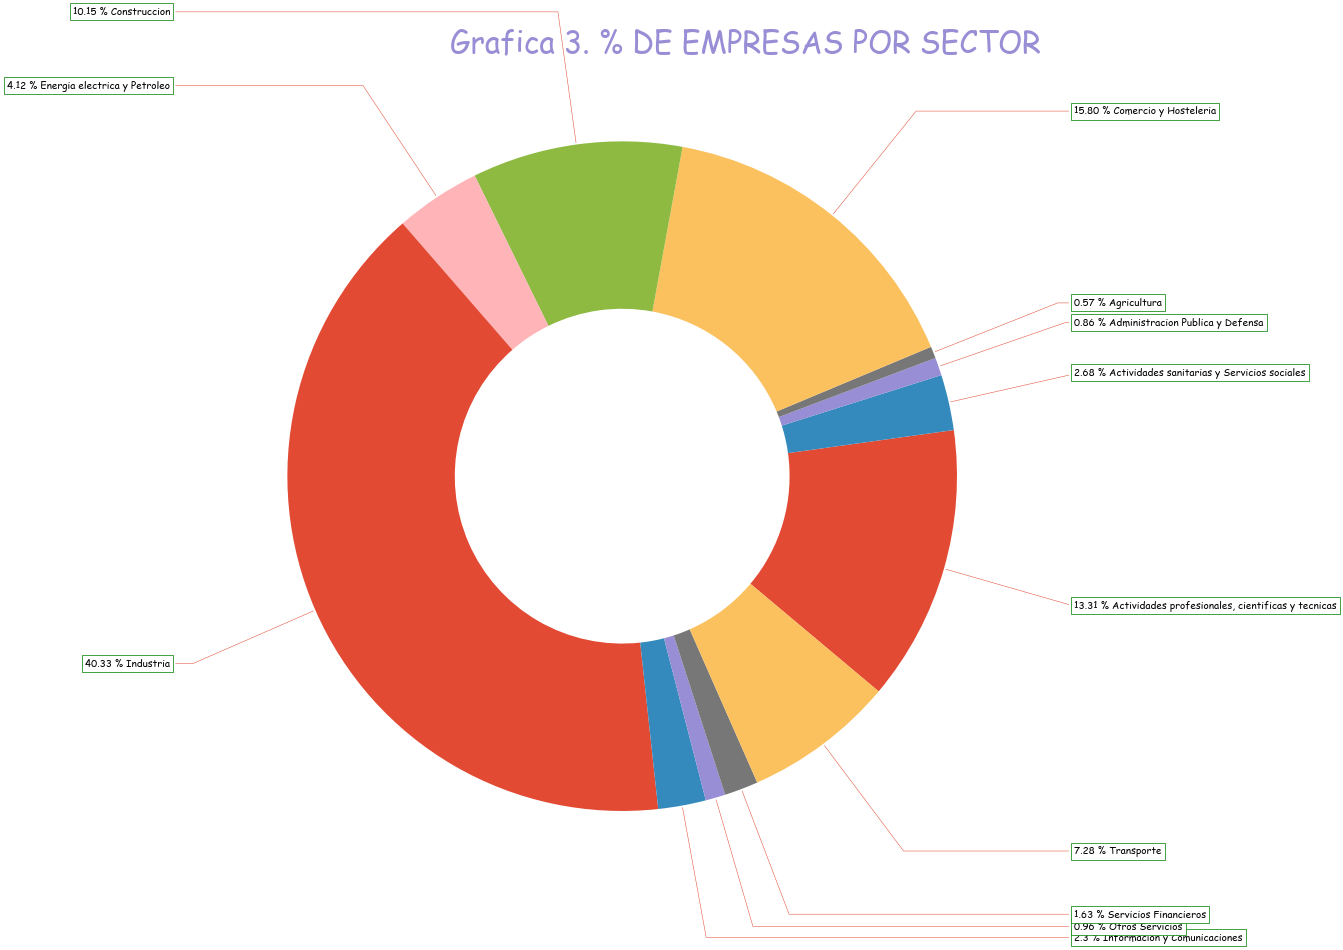

In [575]:
#We represent these percentages on a donut

fig, ax = plt.subplots(figsize=(15, 17), subplot_kw=dict(aspect="equal"))

recipe = ["13.31 % Actividades profesionales, cientificas y tecnicas",
          "2.68 % Actividades sanitarias y Servicios sociales",
          "0.86 % Administracion Publica y Defensa",
          "0.57 % Agricultura",
          "15.80 % Comercio y Hosteleria",
          "10.15 % Construccion",
          "4.12 % Energia electrica y Petroleo",       
          "40.33 % Industria",
         "2.3 % Informacion y Comunicaciones",
         "0.96 % Otros Servicios",
         "1.63 % Servicios Financieros",
         "7.28 % Transporte"]

data = [13.31, 2.68, 0.86, 0.57, 15.80, 10.15, 4.12, 40.33, 2.3, 0.96, 1.63, 7.28]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="g", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-", color="C7"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

plt.title("Grafica 3. % DE EMPRESAS POR SECTOR", loc='right', fontsize=30, color='C2')

plt.savefig(os.path.join('grafica_3.png'), dpi=800, format='png', bbox_inches='tight');
plt.show()



#As we can see in Vizcaya, companies in the Industrial sector predominate with 40% followed by companies in the commerce sector
#and the hotel and catering sector with approximately 15%. Industrial companies predominate above all. The least are those belonging to the agricultural sector.
#agricultural sector. 

#### ***GRAPH 4: 10 MOST COMMON LOCATIONS IN VIZCAYA WHERE THE MAJORITY OF COMPANIES ARE CONCENTRATED***

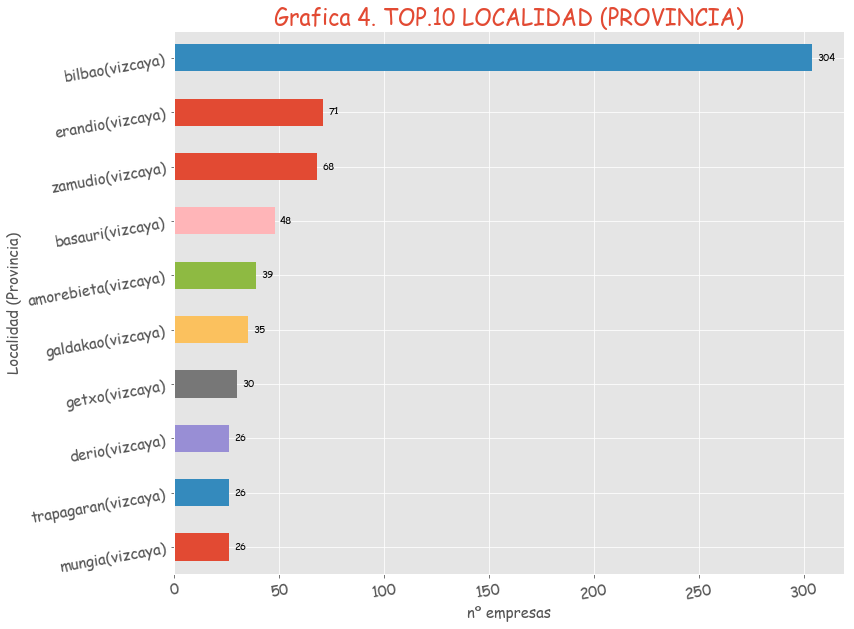

In [576]:
#We represent the number of companies grouped in the 10 most common locations.

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

company_location=vizcaya1['Localidad (Provincia)'].value_counts()
ten_common_2=company_location[:10].sort_values().plot(kind='barh', fontsize=13, figsize=(12, 10))

ten_common_2.set_title(u"Grafica 4. TOP.10 LOCALIDAD (PROVINCIA)", loc='center', fontsize=22, color='C0')
ten_common_2.set_xlabel(u'nº empresas', fontsize=15)
ten_common_2.set_ylabel('Localidad (Provincia)', fontsize=15);
plt.xticks(rotation=10, fontsize=15);
plt.yticks(rotation=10, fontsize=15);

rects = ten_common_2.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig(os.path.join('grafica_4.png'), dpi=900, format='png', bbox_inches='tight')

#We can see that most of the companies in Vizcaya are located in Bilbao. 

#### ***GRAPH 5: LINEAR REPRESENTATION OF AVERAGE SALES AND EBITDA (2016-2017)***

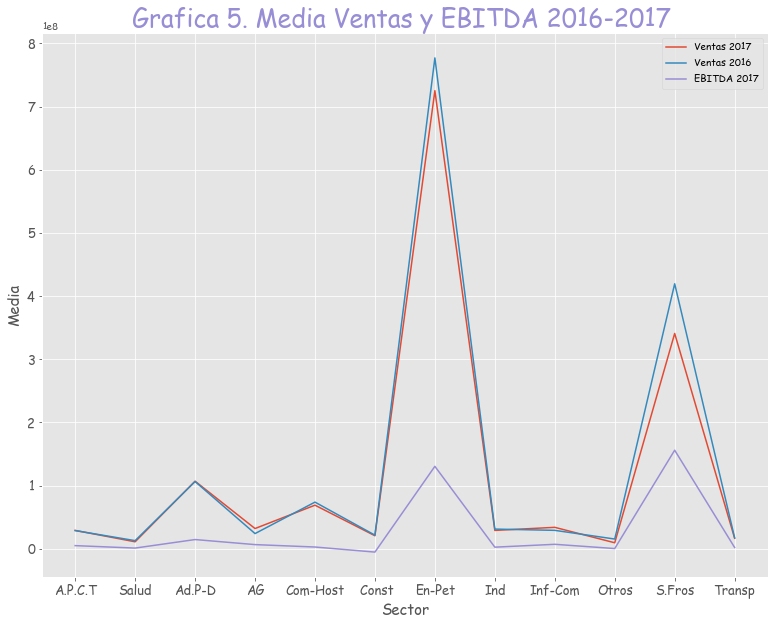

In [577]:
#Drawing the average of 2016 and 2017 Sales, as well as 2017 EBITDA.

mean_sales_ebitda = vizcaya1.groupby('Sector').mean()[["Ventas 2017","Ventas 2016","EBITDA 2017"]]
mean_sales_ebitda1 = mean_sales_ebitda.reset_index()

mean = mean_sales_ebitda1.plot(kind='line', fontsize=13, figsize=(13, 10))
plt.title(u"Grafica 5. Media Ventas y EBITDA 2016-2017 ", loc='center', fontsize=25, color='C2')

plt.xlabel("Sector", fontsize=15)
plt.ylabel('Media', fontsize=15)

plt.xticks(np.arange(12),('A.P.C.T', 'Salud','Ad.P-D', 'AG', 'Com-Host',' Const','En-Pet','Ind',
                          'Inf-Com','Otros','S.Fros','Transp'));


plt.savefig(os.path.join('grafica_5.png'), dpi=800, format='png', bbox_inches='tight')

#We can see that the sectors that achieved the highest sales and EBITDA in both 2016 and 2017 were the. 
#electrical energy and petroleum sector and, for their part, the financial services sector. 

#### ***GRAPH 6: HISTOGRAM OF EMPLOYEES IN ERANDIO (VIZCAYA)***

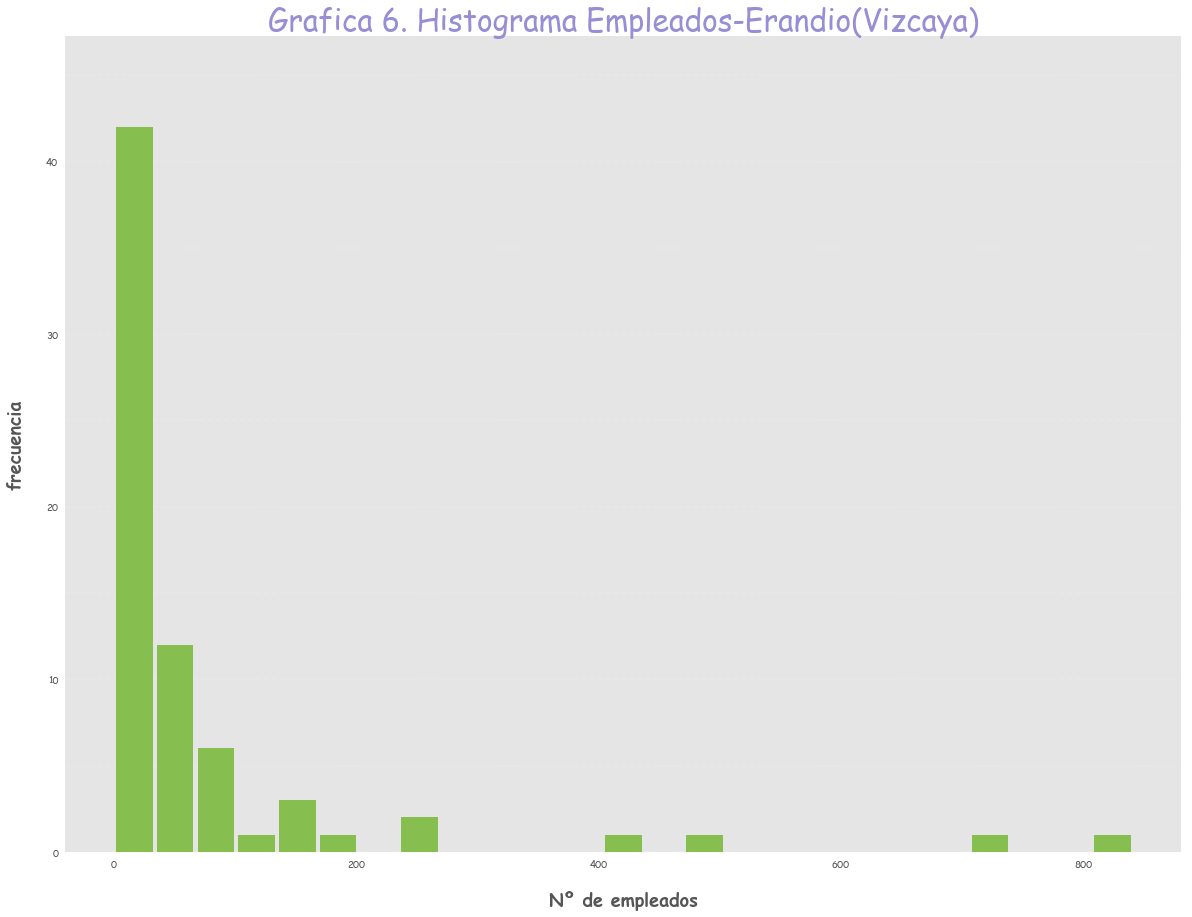

In [578]:
#Vamos a filtrar nuestro dataset para obtener solo las empresas ubicadas en Erandio (Vizcaya)...

filtro_1=vizcaya1['Localidad (Provincia)'] == "erandio(vizcaya)"
erandio_company = vizcaya1[filtro_1]

#Present the histogram of the number of employees in Erandio
from matplotlib.ticker import StrMethodFormatter

ax = erandio_company.hist(column='Empleados', bins=25, grid=False, figsize=(20,15), color='#86bf50', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Grafica 6. Histograma Empleados-Erandio(Vizcaya)", loc='center', fontsize=30, color='C2')

    # Set x-axis label
    x.set_xlabel(u"Nº de empleados", labelpad=20, weight='bold', size=18)

    # Set y-axis label
    x.set_ylabel("frecuencia", labelpad=20, weight='bold', size=18)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig(os.path.join('grafica_6.png'), dpi=700, format='png', bbox_inches='tight');

#### ***GRAPH 7: REGRESSION OF NUMBER OF EMPLOYEES AND SALES 2017 OF ERANDIO (VIZCAYA)***

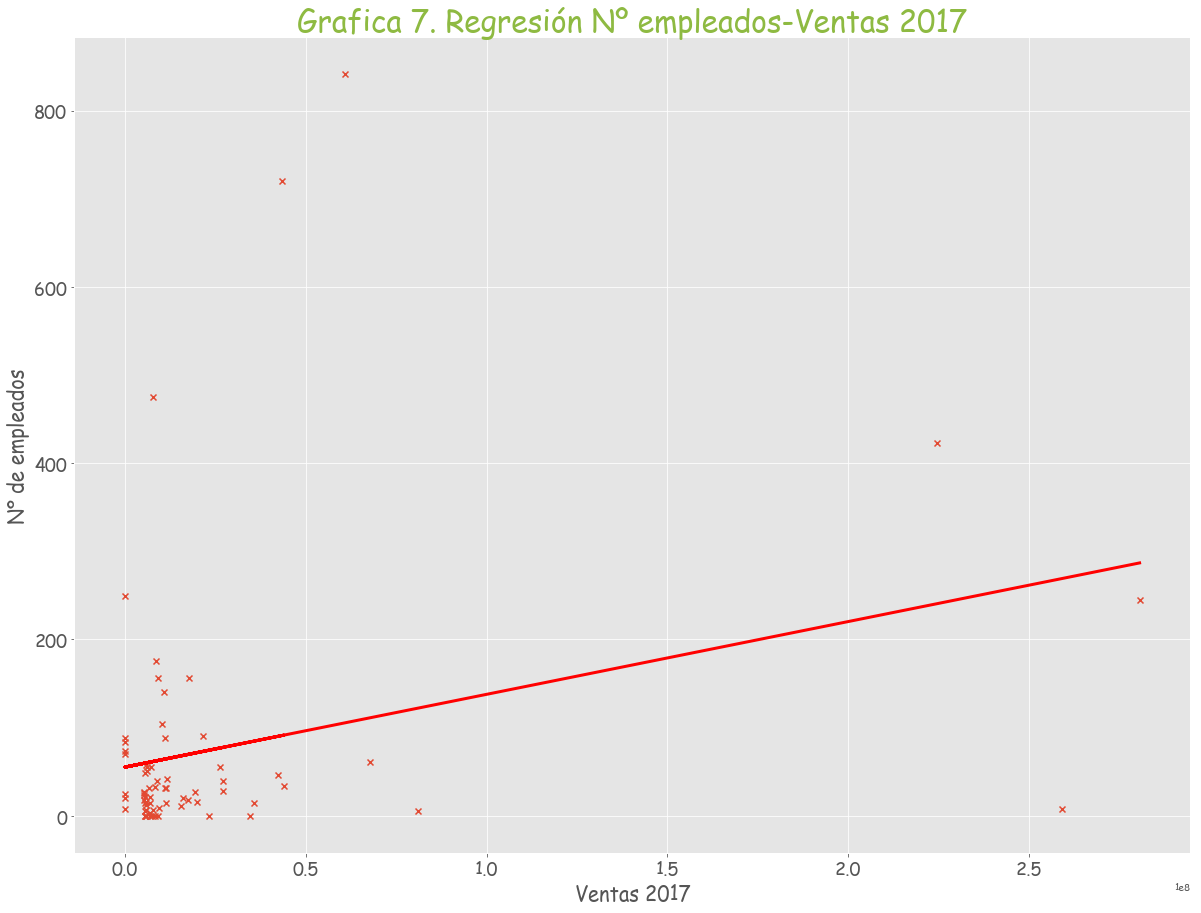

In [579]:
#We graphically represent the regression between Sales 2017 and number of employees...
from scipy.stats import linregress

x = erandio_company["Ventas 2017"]
y = erandio_company["Empleados"]

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(20,15))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.title(u"Grafica 7. Regresión Nº empleados-Ventas 2017", loc='center', fontsize=30, color='C5')
plt.xlabel("Ventas 2017", fontsize=20)
plt.ylabel(u"Nº de empleados", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig(os.path.join('grafica_7.png'), dpi=700, format='png', bbox_inches='tight');

#### ***GRAFICA 8: REPRESENTACION DE LAS VENTAS DEL AÑO 2016 Y 2017 EN ZAMUDIO (VIZCAYA)***

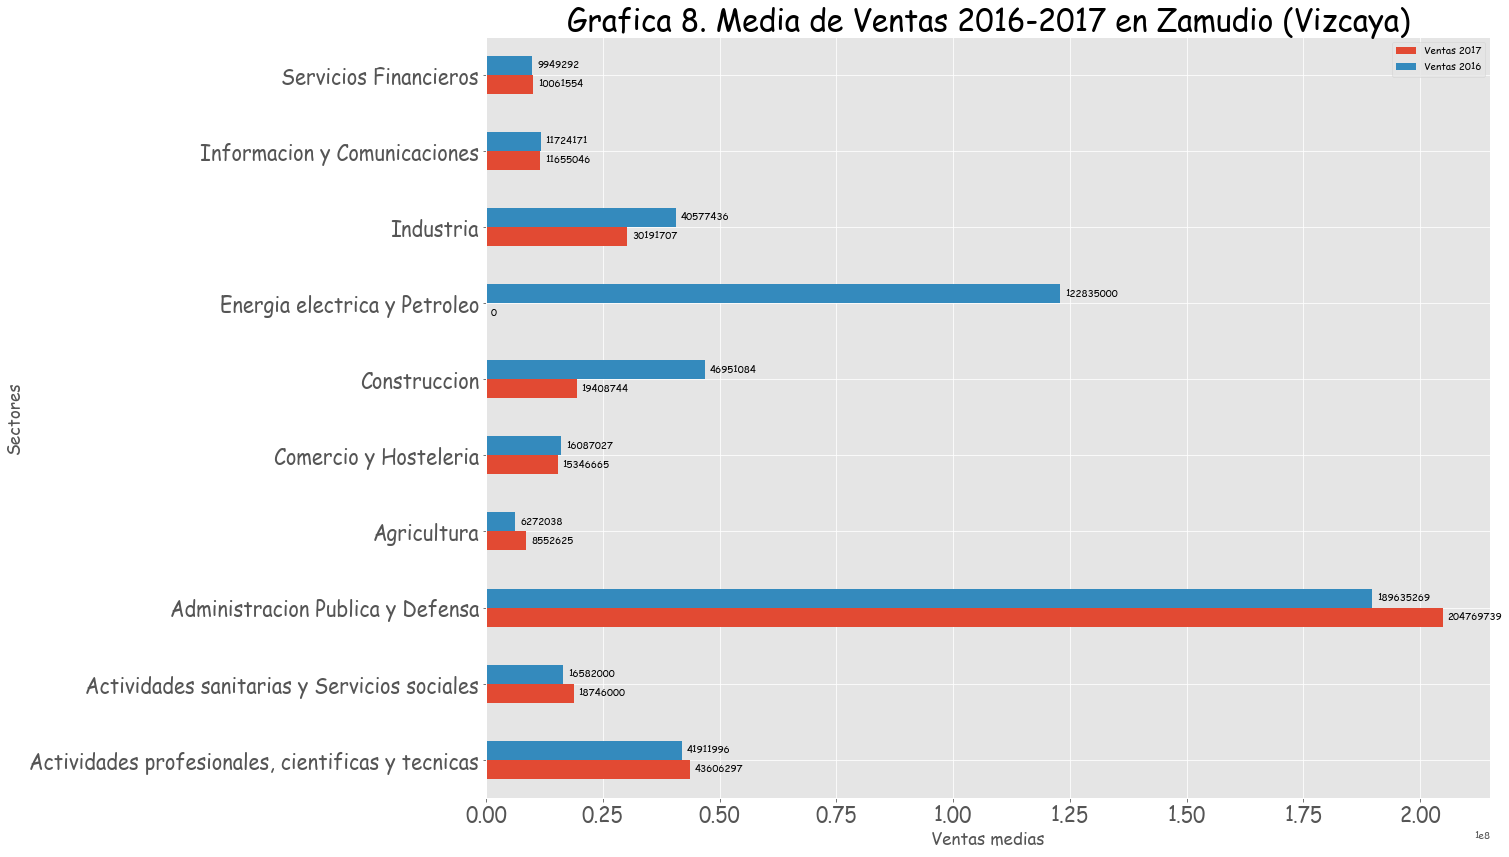

In [580]:
#We represent the sales in 2016 and 2017 in the companies of Zamudio (Vizcaya), the third place with the highest presence of companies.

#filter...
filtro_2=vizcaya1['Localidad (Provincia)'] == "zamudio(vizcaya)"
zamudio_company = vizcaya1[filtro_2]

#We group and represent...
ventas_1716=zamudio_company.groupby("Sector").mean()[["Ventas 2017","Ventas 2016"]]

ax = ventas_1716[['Ventas 2017','Ventas 2016']].plot(kind='barh',
                                                     figsize=(18, 14), legend=True, fontsize=20)
ax.set_title("Grafica 8. Media de Ventas 2016-2017 en Zamudio (Vizcaya)", fontsize=30 )
ax.set_xlabel("Ventas medias", fontsize=17)
ax.set_ylabel("Sectores", fontsize=17)

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig(os.path.join('grafica_8.png'), dpi=700, format='png', bbox_inches='tight')
plt.show()

#Here we can see that in Zamudio the companies with the highest average sales are those in the Public Administration and Defense sectors.
#and Defense, unlike before, since in general terms we saw that the predominant sector was the electric energy and petroleum sector. 

#### ***GRAPH 9: REPRESENTATION OF THE PERCENTAGE OF COMPANIES IN ZAMUDIO (VIZCAYA) BY SECTOR (PIE))***

In [564]:
#Now let's find out the percentage of Zamudio companies in each sector.
empresas_zamudio=zamudio_company['Sector'].value_counts()
total_empresas_zam=zamudio_company["Empresa"].count()
porcentaje_zamudio=empresas_zamudio/total_empresas_zam*100

lista_vacia_2=[]
for i in porcentaje_zamudio:
    lista_vacia_2.append(round(i,2))

sector_zamudio=empresas_zamudio.reset_index()
sector_zam=sector_zamudio["index"]
porcentaje_sector=pd.DataFrame({"sectores":sector_zam,"Porcentajes":lista_vacia_2})


porcentaje_sector

,Porcentajes,sectores
0,41.18,Industria
1,20.59,Comercio y Hosteleria
2,10.29,Construccion
3,7.35,"Actividades profesionales, cientificas y tecnicas"
4,7.35,Informacion y Comunicaciones
5,5.88,Administracion Publica y Defensa
6,2.94,Servicios Financieros
7,1.47,Actividades sanitarias y Servicios sociales
8,1.47,Agricultura
9,1.47,Energia electrica y Petroleo


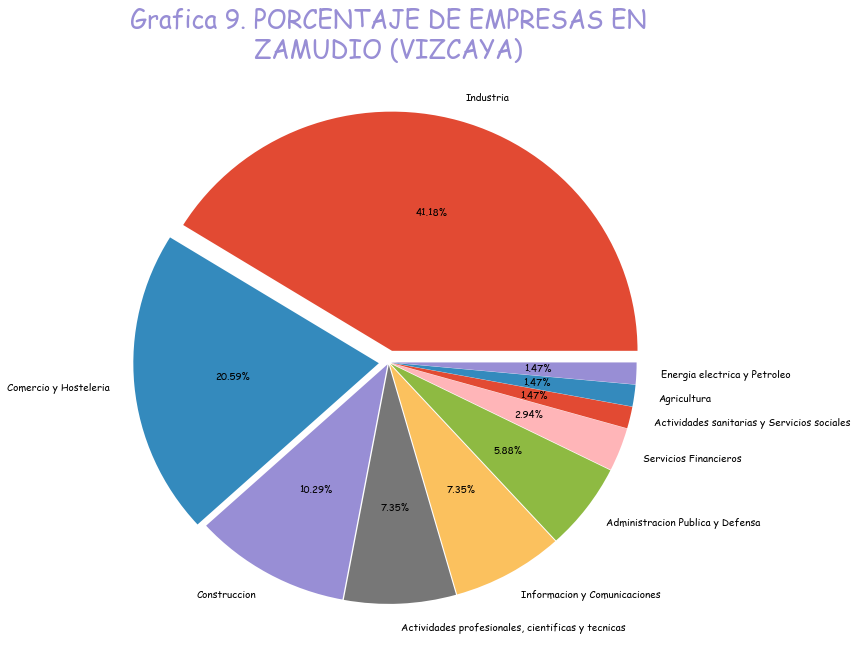

In [566]:
#We Represent 

sectorzam = porcentaje_sector["sectores"]
porcentajes = porcentaje_sector["Porcentajes"]
explode = (0.05, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  
plot = plt.pie(porcentajes, labels=sectorzam, explode=explode, autopct='%1.2f%%', shadow=False, startangle=360)
fig = plt.gcf()
fig.set_size_inches(11,11) 
plt.title("Grafica 9. PORCENTAJE DE EMPRESAS EN\n"+"ZAMUDIO (VIZCAYA)", fontsize=25, color="C2")

plt.savefig(os.path.join('grafica_9.png'), dpi=600, format='png', bbox_inches='tight')
plt.show()

#Through this graph we can see that the two main factors in Zamudio are the industrial and the commerce-hospitality sectors.

#### ***GRAPH 10: REPRESENTATION OF THE PERCENTAGE OF COMPANIES IN BILBAO, ERANDIO, ZAMUDIO AND BASAURI BY SECTOR (PIE)***

In [552]:
#Now let's check the percentages of companies that are also in Bilbao and Erandio and Basauri and then make a subplot of pie

#Empezamos por el filtro con Bilbao y luego los porcentajes...
filtro1=vizcaya1['Localidad (Provincia)'] == "bilbao(vizcaya)"
bilbao_company = vizcaya1[filtro1]
bilbao_sector=bilbao_company["Sector"].value_counts()
total_empresas_bil=bilbao_company["Empresa"].count()
porcentaje_bilbao=bilbao_sector/total_empresas_bil*100

#Erandio...
filtro2=vizcaya1['Localidad (Provincia)'] == "erandio(vizcaya)"
erandio_company = vizcaya1[filtro2]
erandio_sector=erandio_company["Sector"].value_counts()
total_empresas_era=erandio_company["Empresa"].count()
porcentaje_erandio=erandio_sector/total_empresas_era*100

#Zamudio...
filtro3=vizcaya1['Localidad (Provincia)'] == "zamudio(vizcaya)"
zamudio_company = vizcaya1[filtro3]
zamudio_sector=zamudio_company["Sector"].value_counts()
total_empresas_zam=zamudio_company["Empresa"].count()
porcentaje_zamudio=zamudio_sector/total_empresas_zam*100

#Y el filtro con Basauri...
filtro4=vizcaya1['Localidad (Provincia)'] == "basauri(vizcaya)"
basauri_company = vizcaya1[filtro4]
basauri_sector=basauri_company["Sector"].value_counts()
total_empresas_bas=basauri_company["Empresa"].count()
porcentaje_basauri=basauri_sector/total_empresas_bas*100

#Now, I create 4 dataframes with the data of each location and then join them using as key the column "sector".

list_bil=[]
list_era=[]
list_zam=[]
list_bas=[]
for i in porcentaje_bilbao:
    list_bil.append(round(i,2))
sector_bil=porcentaje_bilbao.reset_index()
sector_bil=sector_bil["index"]
sector_bilbao=pd.DataFrame({"sectores":sector_bil,"Porcentajes":list_bil})
sector_bilbao=sector_bilbao.set_index("sectores")

for i in porcentaje_erandio:
    list_era.append(round(i,2))
sector_era=porcentaje_erandio.reset_index()
sector_era=sector_era["index"]
sector_erandio=pd.DataFrame({"sectores":sector_era,"Porcentajes":list_era})
sector_erandio=sector_erandio.set_index("sectores")

for i in porcentaje_zamudio:
    list_zam.append(round(i,2))
sector_zam=porcentaje_zamudio.reset_index()
sector_zam=sector_zam["index"]
sector_zamudio=pd.DataFrame({"sectores":sector_zam,"Porcentajes":list_zam})
sector_zamudio=sector_zamudio.set_index("sectores")

for i in porcentaje_basauri:
    list_bas.append(round(i,2))
sector_bas=porcentaje_basauri.reset_index()
sector_bas=sector_bas["index"]
sector_basauri=pd.DataFrame({"sectores":sector_bas,"Porcentajes":list_bas})
sector_basauri=sector_basauri.set_index("sectores")

tabla_1 = pd.merge(sector_bilbao, sector_erandio, left_index=True, right_index=True, how='outer')
tabla_2 = pd.merge(tabla_1, sector_zamudio, left_index=True, right_index=True, how='outer')
tabla_final = pd.merge(tabla_2, sector_basauri, left_index=True, right_index=True, how='outer')

tabla_sectores = tabla_final.reset_index()
tabla_sectores.columns = ['Sector', 'Bilbao', 'Erandio', 'Zamudio', 'Basauri'] 

In [553]:
tabla_sectores1 = tabla_sectores.set_index("Sector")
tabla_sectores1

,Bilbao,Erandio,Zamudio,Basauri
Sector,,,,
"Actividades profesionales, cientificas y tecnicas",22.70,5.63,7.35,2.08
Actividades sanitarias y Servicios sociales,5.26,1.41,1.47,NaN
Administracion Publica y Defensa,NaN,NaN,5.88,NaN
Agricultura,0.33,NaN,1.47,NaN
Comercio y Hosteleria,9.54,8.45,20.59,52.08
Construccion,14.14,16.90,10.29,6.25
Energia electrica y Petroleo,8.55,NaN,1.47,NaN
Industria,16.78,57.75,41.18,31.25
Informacion y Comunicaciones,2.96,2.82,7.35,6.25


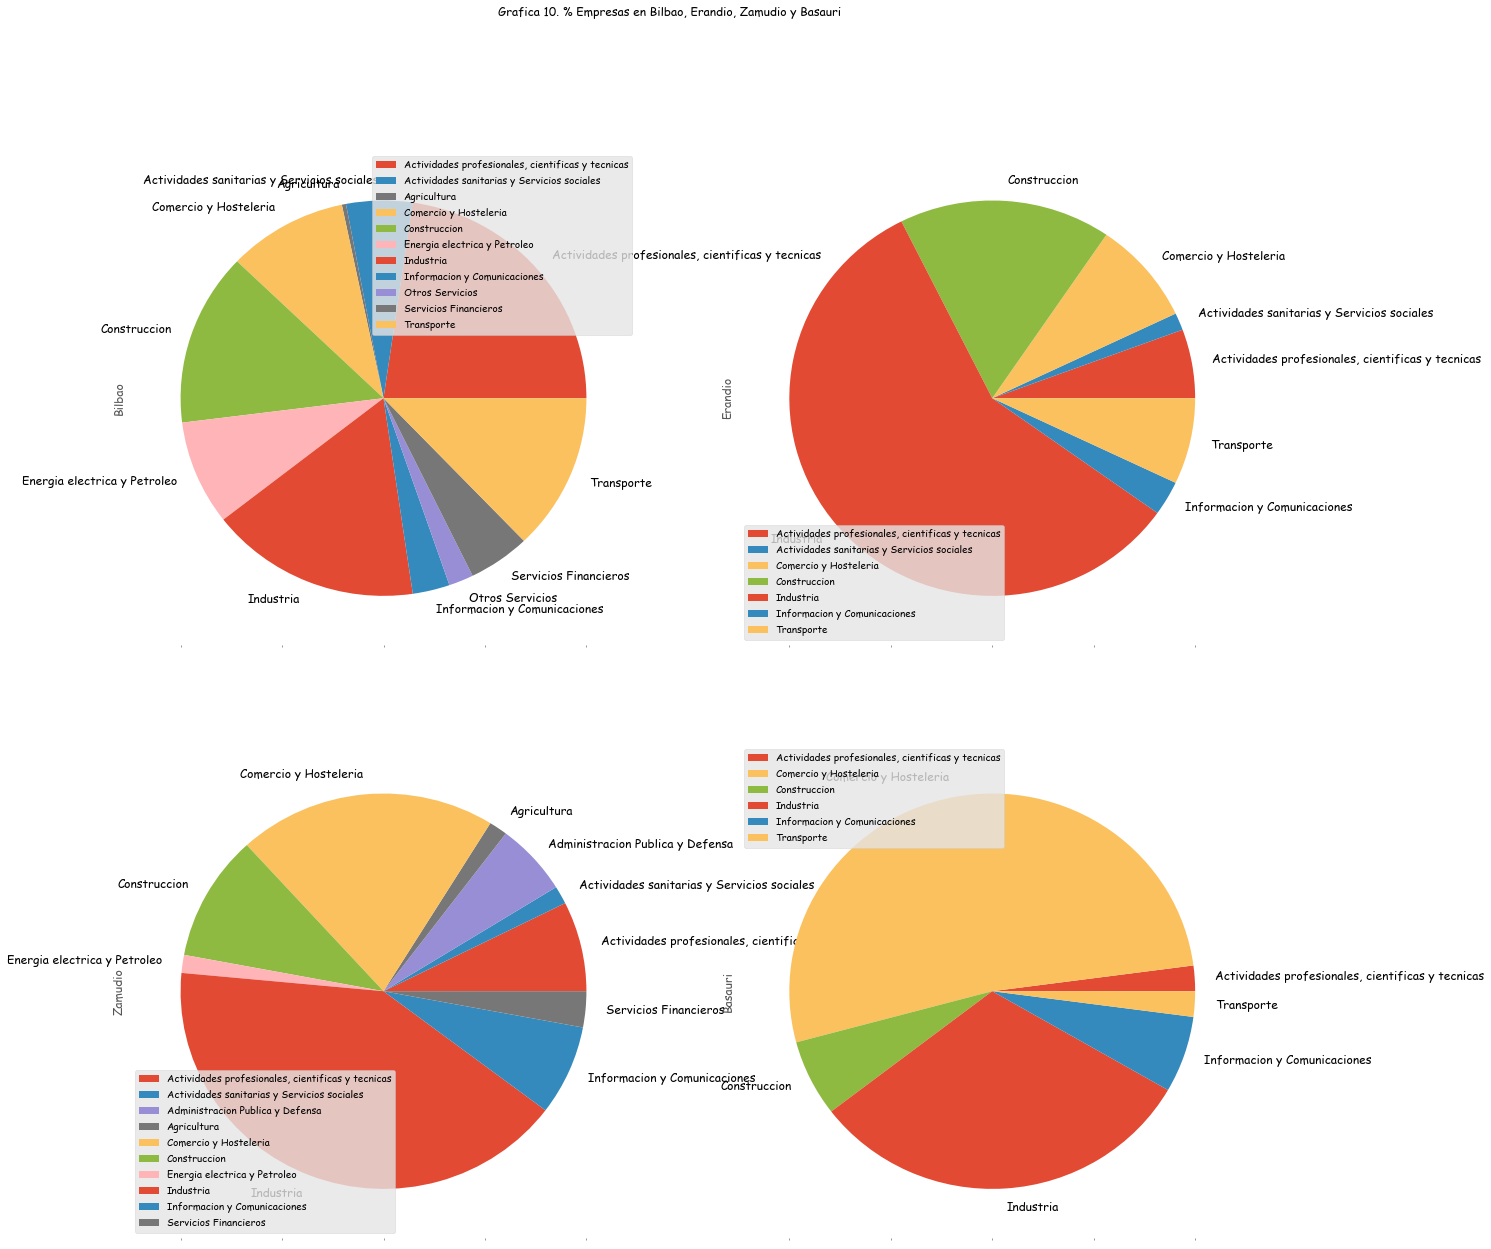

In [570]:
#Once we have obtained the table where we have all the percentages of companies in each sector in Bilbao, Erandio, Zamudio and Basauri.
#We proceed to its representation

tabla_sectores1.plot(kind='pie', subplots=True, layout=(2,2), figsize=(20, 20), fontsize=12, title="Grafica 10. % Empresas en Bilbao, Erandio, Zamudio y Basauri");
plt.legend(
    loc='upper left');

plt.savefig(os.path.join('grafica_10.png'), dpi=700, format='png', bbox_inches='tight')

#### ***GRAPH 11: RANKING OF COMPANIES IN THE ENERGY AND PETROLEUM SECTOR WITH MORE THAN 500 EMPLOYEES***

In [186]:
#We are looking for those companies in the energy and oil sector with more than 2000 employees.

filtro_3 = vizcaya1['Sector'] == "Energia electrica y Petroleo"
energia = vizcaya1[filtro_3]
energia.query('Empleados>2000')

#We only have one company: IBERDROLA DISTRIBUCION ELECTRICA SA. 

,Empresa,Ranking,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados,Sector,Localidad (Provincia),Pagina Web
6,IBERDROLA DISTRIBUCION ELECTRICA SA,71,2120707000,2147758000,691064000,1486499000,3795,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...


In [221]:
#Let's look now at those with more than 500 employees.
energia.query('Empleados>500')

#we already have 6 companies

,Empresa,Ranking,Ventas 2017,Ventas 2016,Resultado 2017,EBITDA 2017,Empleados,Sector,Localidad (Provincia),Pagina Web
0,IBERDROLA CLIENTES SA,15,7564431000,7438203000,424119000,575519000,503,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...
2,PETROLEOS DEL NORTE SA,21,5446768000,4619628000,178224000,255933000,1035,Energia electrica y Petroleo,muskiz(vizcaya),http://www.infocif.es/ficha-empresa/petroleos-...
5,IBERDROLA SA,56,2731189000,2639838000,1598871000,1869871000,719,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-sa
6,IBERDROLA DISTRIBUCION ELECTRICA SA,71,2120707000,2147758000,691064000,1486499000,3795,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...
8,IBERDROLA ESPAÑA SA,82,1846165000,1833374000,1515181000,1531166000,971,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...
11,IBERDROLA GENERACION SA,164,1054837000,1256277000,-1343435000,-1169782000,1217,Energia electrica y Petroleo,bilbao(vizcaya),http://www.infocif.es/ficha-empresa/iberdrola-...


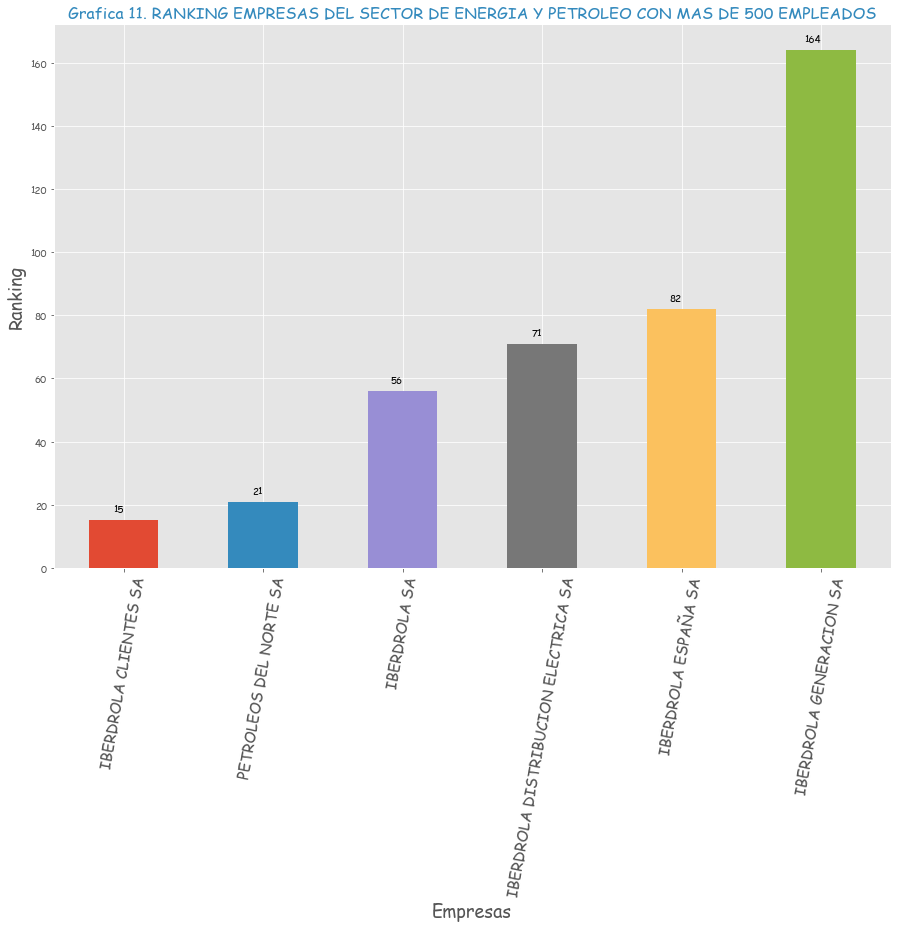

In [572]:
#Let's represent the companies in Biscay with more than 500 employees according to the ranking.

mas_500 = energia.query('Empleados>500')
mas_500 = mas_500.set_index("Empresa")

ax=mas_500["Ranking"].plot(kind="bar", figsize=(15,10));
plt.title("Grafica 11. RANKING EMPRESAS DEL SECTOR DE ENERGIA Y PETROLEO CON MAS DE 500 EMPLEADOS", fontsize=16, color="C1")
plt.xlabel("Empresas", fontsize=18)
plt.ylabel("Ranking", fontsize=18)
plt.xticks(rotation=80, fontsize=15);

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='right',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
# Call the function above. 
add_value_labels(ax)

plt.savefig(os.path.join('grafica_11.png'), dpi=700, format='png', bbox_inches='tight')

#We can see that the one with the highest ranking is IBERDROLA GENERACION SA, of all the companies in Vizcaya in the sector of 
#energy and oil with more than 500 employees. It is in the 164th ranking of all Spain, because this column is given at the level of the whole country. 
#the whole country, but analyzing only those of Vizcaya...

# ***END***